In [1]:
# import required packages

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
white_wines = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print(white_wines.shape)
white_wines.sample(10)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.99150,3.27,0.55,11.40,6
102,6.0,0.21,0.24,12.1,0.050,55.0,164.0,0.99700,3.34,0.39,9.40,5
4211,7.1,0.38,0.42,11.8,0.041,32.0,193.0,0.99624,3.04,0.49,10.00,6
2892,6.7,0.42,0.46,9.7,0.054,67.0,234.0,0.99848,3.23,0.50,9.00,5
2081,7.5,0.42,0.14,10.7,0.046,18.0,95.0,0.99590,3.22,0.33,10.70,5
124,6.4,0.13,0.47,1.6,0.092,40.0,158.0,0.99280,3.21,0.36,9.80,6
466,7.0,0.14,0.32,9.0,0.039,54.0,141.0,0.99560,3.22,0.43,9.40,6
3292,6.6,0.28,0.41,7.0,0.046,59.0,194.0,0.99558,3.14,0.48,9.40,5
2662,7.0,0.23,0.33,1.0,0.043,46.0,110.0,0.99118,3.04,0.65,10.80,6
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7


In [4]:
white_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
print(white_wines.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


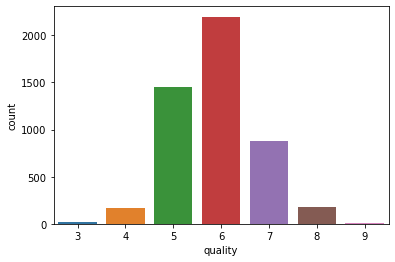

In [6]:
sns.countplot(x='quality', data=white_wines)
plt.show()

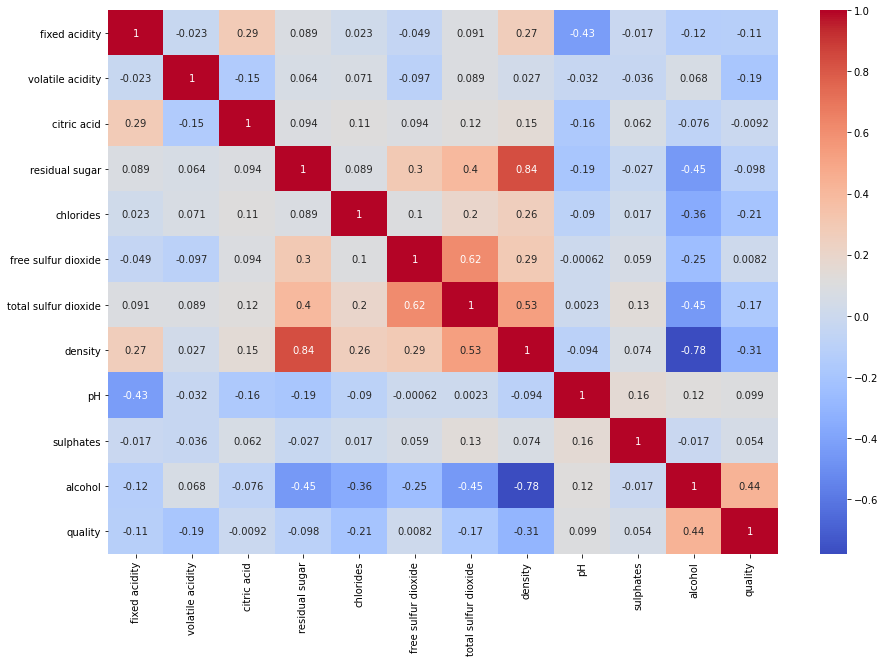

In [7]:
# check correlations between features

plt.subplots(figsize=(15, 10))
sns.heatmap(white_wines.corr(), annot = True, cmap = 'coolwarm')

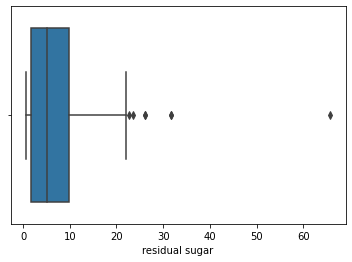

In [8]:
#check outliers in data

sns.boxplot(x = white_wines['residual sugar'])

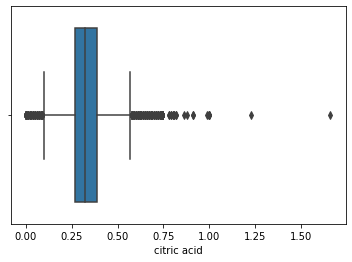

In [9]:
sns.boxplot(x = white_wines['citric acid'])

In [10]:
# remove outliers by using Z-score

z = np.abs(stats.zscore(white_wines))
white_wines = white_wines[(z < 3).all(axis=1)]
white_wines.shape

(4487, 12)

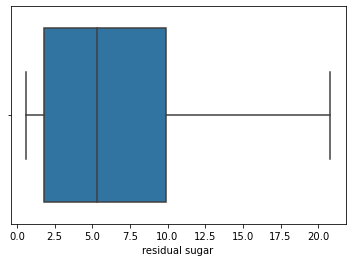

In [11]:
#check outliers again

sns.boxplot(x = white_wines['residual sugar'])

In [12]:
# Transform the problem into a classification problem

reviews = []
for i in white_wines['quality']:
    if i == 3 or i == 4:
        reviews.append('1')
    elif i > 4 and i < 8:
        reviews.append('2')
    elif i == 8 or i == 9:
        reviews.append('3')
white_wines['Reviews'] = reviews
Counter(white_wines['Reviews'])

Counter({'2': 4202, '3': 161, '1': 124})

In [13]:
# Define features X
X = np.asarray(white_wines.iloc[:,:11])
# Define target y
y = np.asarray(white_wines['Reviews'])

In [14]:
# standarlizing the dataset

X = preprocessing.StandardScaler().fit(X).transform(X)

In [15]:
# Train and test split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (3589, 11) (3589,)
Test set: (898, 11) (898,)


In [16]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Train set with SMOTE: (10062, 11) (10062,)


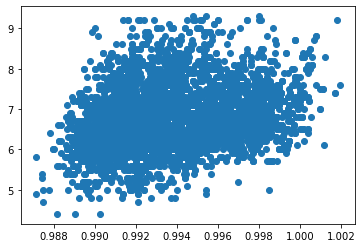

In [17]:
print ('Train set with SMOTE:', X_train_res.shape, y_train_res.shape)
origin_density = white_wines['density'].to_numpy()
origin_acidity = white_wines['fixed acidity'].to_numpy()
plt.scatter(origin_density, origin_acidity)

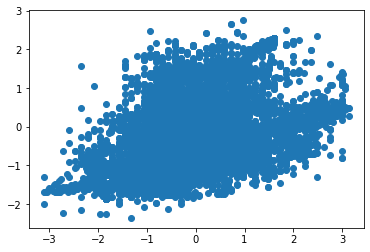

In [18]:
plt.scatter(X_train_res[:,0], X_train_res[:,7])